# WeatherPy

# Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#numb_cities=1500

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude¶

# Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
units = "Metric"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = "https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"
    city_url=f"{url}?appid={weather_api_key}&q={city}&units={units}"
    
    
    #city_url= url+ "appid" + weather_api_key +"&q"=city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        #print(city_url)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | kitui
Processing Record 3 of Set 1 | lang son
Processing Record 4 of Set 1 | mayumba
Processing Record 5 of Set 1 | lolua
City not found. Skipping...
Processing Record 6 of Set 1 | champoton
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | homer
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | ahuimanu
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | okhotsk
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | urumqi
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | vestmannaeyjar
Processing Record 20 of Set 1 | arlit
Processing Record 21 of Set 1 | pafos
Processing Record 22 of Set 1 | 

City not found. Skipping...
Processing Record 36 of Set 4 | grindavik
Processing Record 37 of Set 4 | korla
Processing Record 38 of Set 4 | komatsu
Processing Record 39 of Set 4 | chifeng
Processing Record 40 of Set 4 | dingzhou
Processing Record 41 of Set 4 | horta
Processing Record 42 of Set 4 | molteno
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | rocha
Processing Record 45 of Set 4 | brownsville
Processing Record 46 of Set 4 | mandera
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | kaa-khem
Processing Record 49 of Set 4 | margate
Processing Record 0 of Set 5 | santa barbara
Processing Record 1 of Set 5 | tessalit
Processing Record 2 of Set 5 | hambantota
Processing Record 3 of Set 5 | palana
Processing Record 4 of Set 5 | makat
Processing Record 5 of Set 5 | flic en flac
Processing Record 6 of Set 5 | hovd
Processing Record 7 of Set 5 | san luis
Processing Record 8 of Set 5 | santa cruz
Processing Record 9 of Set 5 | ekibastuz
Pro

Processing Record 27 of Set 8 | lebu
Processing Record 28 of Set 8 | hay river
Processing Record 29 of Set 8 | port blair
Processing Record 30 of Set 8 | iberia
Processing Record 31 of Set 8 | port shepstone
Processing Record 32 of Set 8 | anacortes
Processing Record 33 of Set 8 | bubaque
Processing Record 34 of Set 8 | marsh harbour
Processing Record 35 of Set 8 | chagda
City not found. Skipping...
Processing Record 36 of Set 8 | burnie
Processing Record 37 of Set 8 | warsaw
Processing Record 38 of Set 8 | waipawa
Processing Record 39 of Set 8 | mookane
Processing Record 40 of Set 8 | vyazemskiy
Processing Record 41 of Set 8 | khonuu
City not found. Skipping...
Processing Record 42 of Set 8 | samusu
City not found. Skipping...
Processing Record 43 of Set 8 | ingham
Processing Record 44 of Set 8 | muros
Processing Record 45 of Set 8 | boende
Processing Record 46 of Set 8 | pella
Processing Record 47 of Set 8 | thinadhoo
Processing Record 48 of Set 8 | beinamar
Processing Record 49 of S

Processing Record 17 of Set 12 | gornopravdinsk
Processing Record 18 of Set 12 | pendleton
Processing Record 19 of Set 12 | zaraysk
Processing Record 20 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 21 of Set 12 | lushunkou
City not found. Skipping...
Processing Record 22 of Set 12 | zhaoqing
Processing Record 23 of Set 12 | mrirt
City not found. Skipping...
Processing Record 24 of Set 12 | ixtapa
Processing Record 25 of Set 12 | makakilo city
Processing Record 26 of Set 12 | granard
Processing Record 27 of Set 12 | vysokogornyy
Processing Record 28 of Set 12 | salalah
Processing Record 29 of Set 12 | buchanan
Processing Record 30 of Set 12 | ruteng
Processing Record 31 of Set 12 | elko
Processing Record 32 of Set 12 | bekwai
Processing Record 33 of Set 12 | gwadar
Processing Record 34 of Set 12 | alyangula
Processing Record 35 of Set 12 | kargil
Processing Record 36 of Set 12 | oktyabrskoye
Processing Record 37 of Set 12 | mezen
Processing Record 38 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,18.72,77,42,1.60,ZA,1667704379
1,kitui,-1.3670,38.0106,17.62,94,85,1.39,KE,1667704408
2,lang son,21.8333,106.7333,23.34,54,0,1.96,VN,1667704345
3,mayumba,-3.4320,10.6554,24.46,91,84,2.77,GA,1667704409
4,champoton,19.3500,-90.7167,26.16,83,87,2.73,MX,1667704410
...,...,...,...,...,...,...,...,...,...
543,kargil,34.5667,76.1000,0.80,55,100,2.36,IN,1667704403
544,oktyabrskoye,43.0645,44.7417,3.08,100,100,2.00,RU,1667704693
545,mezen,65.8522,44.2400,1.42,93,100,3.32,RU,1667704693
546,harboore,56.6175,8.1807,11.75,96,99,11.10,DK,1667704694


In [5]:
# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [6]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,18.72,77,42,1.60,ZA,1667704379
1,kitui,-1.3670,38.0106,17.62,94,85,1.39,KE,1667704408
2,lang son,21.8333,106.7333,23.34,54,0,1.96,VN,1667704345
3,mayumba,-3.4320,10.6554,24.46,91,84,2.77,GA,1667704409
4,champoton,19.3500,-90.7167,26.16,83,87,2.73,MX,1667704410


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,18.72,77,42,1.60,ZA,1667704379
1,kitui,-1.3670,38.0106,17.62,94,85,1.39,KE,1667704408
2,lang son,21.8333,106.7333,23.34,54,0,1.96,VN,1667704345
3,mayumba,-3.4320,10.6554,24.46,91,84,2.77,GA,1667704409
4,champoton,19.3500,-90.7167,26.16,83,87,2.73,MX,1667704410


# Create the Scatter Plots Requested


# Latitude Vs. Temperature

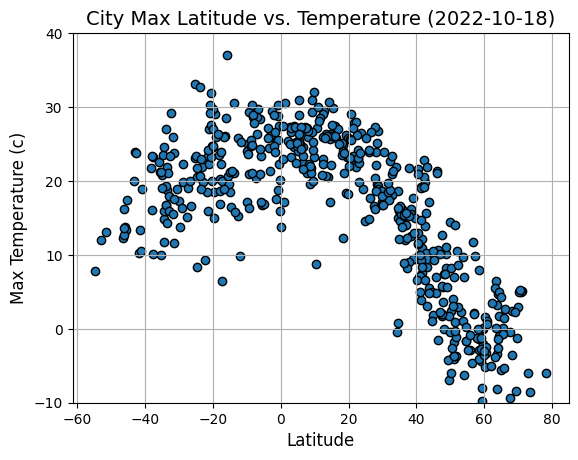

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (c)", fontsize=12)
plt.ylim(-10,40)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

# Latitude Vs. Humidity

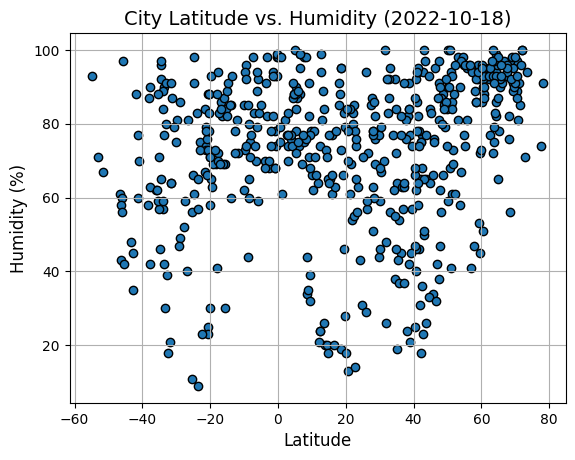

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


# Latitude Vs. Cloudiness¶

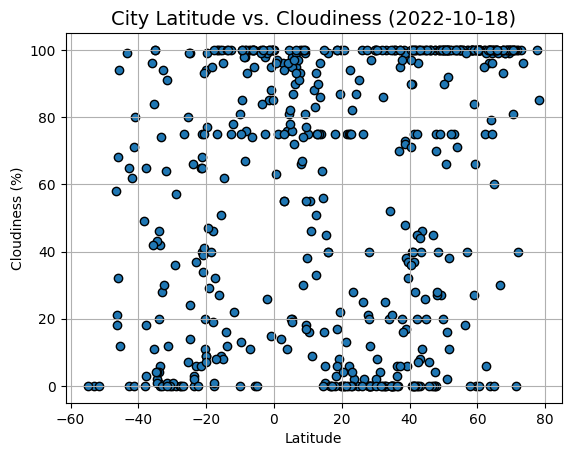

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


# Latitude vs. Wind Speed Plot

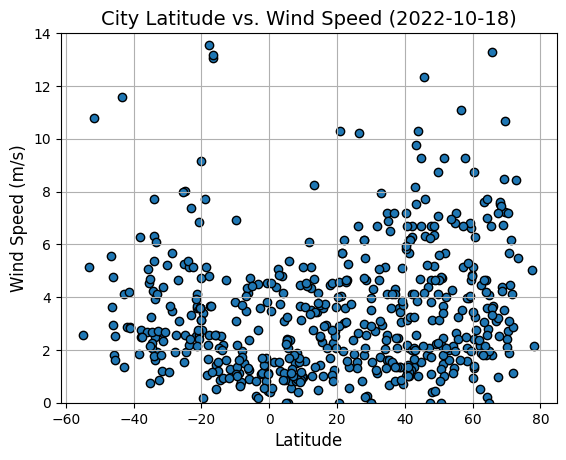

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.ylim(0,14)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(4,-10),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel ("Max Temp")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lang son,21.8333,106.7333,23.34,54,0,1.96,VN,1667704345
4,champoton,19.3500,-90.7167,26.16,83,87,2.73,MX,1667704410
5,butaritari,3.0707,172.7902,26.60,74,55,3.73,KI,1667704410
6,homer,59.6425,-151.5483,-2.07,45,0,4.63,US,1667704385
8,ahuimanu,21.4447,-157.8378,27.84,69,75,5.66,US,1667704411


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,18.72,77,42,1.60,ZA,1667704379
1,kitui,-1.3670,38.0106,17.62,94,85,1.39,KE,1667704408
3,mayumba,-3.4320,10.6554,24.46,91,84,2.77,GA,1667704409
7,busselton,-33.6500,115.3333,21.83,42,6,2.48,AU,1667704365
9,punta arenas,-53.1500,-70.9167,12.06,71,0,5.14,CL,1667704375


# Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8746329944111646


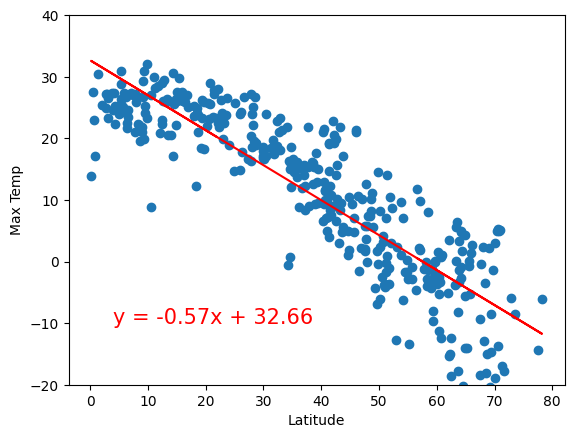

None


In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values =northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel ("Max Temp")
plt.ylim (-20,40)
print(linear_plot(x_values,y_values))

In [17]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel ("Max Temp")
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: 0.4674810634622282


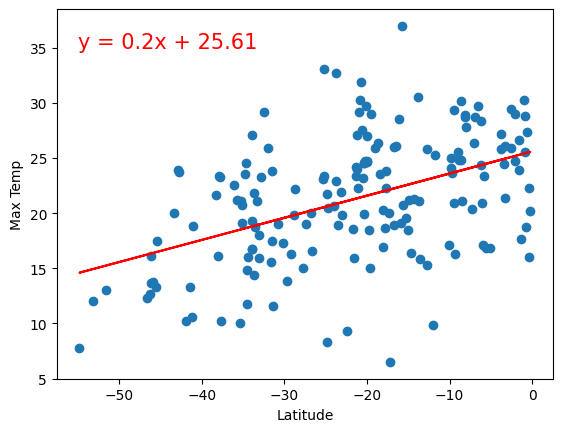

None


In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values =southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel ("Max Temp")
print(linear_plot(x_values,y_values))

# Discussion about the linear relationship: 

Northern Hemisphere: Shows negative correlation between Max Temperature and Latitude.r ≥ 0.7 shows strong correlation exiting between Max Temp and Latitude.
Southern Hemisphere: Shows positive relationship between Max Temperature and Latitude. 0.3 ≤ r < 0.5  shows weak correlation between MAx Temp and Latitude.

# Humidity vs. Latitude Linear Regression Plot

In [19]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.annotate(line_eq,(40,15),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel ("Humidity")
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: 0.280040997178553


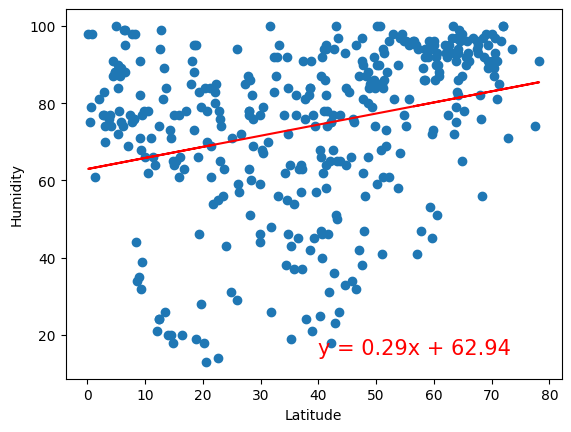

None


In [20]:
# Northern Hemisphere
# YOUR CODE HERE
x_values =northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel ("Humidity")
print(linear_plot(x_values,y_values))

In [21]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel ("Humidity")
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: 0.303112982582492


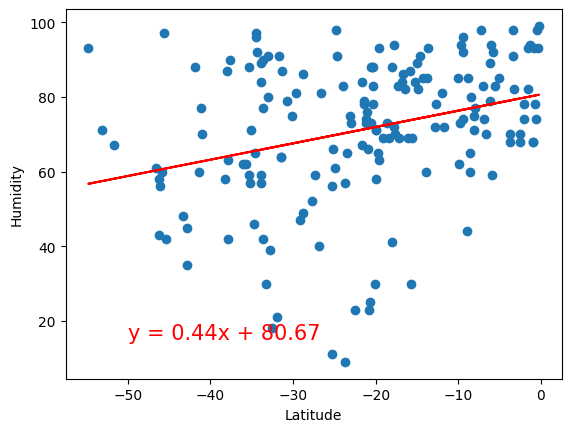

None


In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values =southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel ("Humidity")
print(linear_plot(x_values,y_values))

# Discussion about the linear relationship: 

Northern Hemisphere Humidity and Latitude have positive correlation,r < 0.3 shows no or very weak correlation.Southern Hemisphere have positive correlation exits between Humidity and Latitude have 0.3 ≤ r < 0.5 shows weak correlation.

# Cloudiness vs. Latitude Linear Regression Plot

In [23]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.annotate(line_eq,(40,10),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel ("Cloudiness")
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: 0.2513387765162263


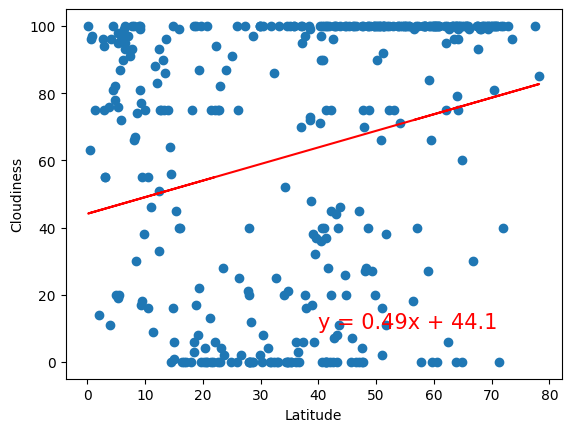

None


In [24]:
# Northern Hemisphere
# YOUR CODE HERE
x_values =northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness")
print(linear_plot(x_values,y_values))

In [25]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel ("Cloudiness")
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: 0.44512579965327176


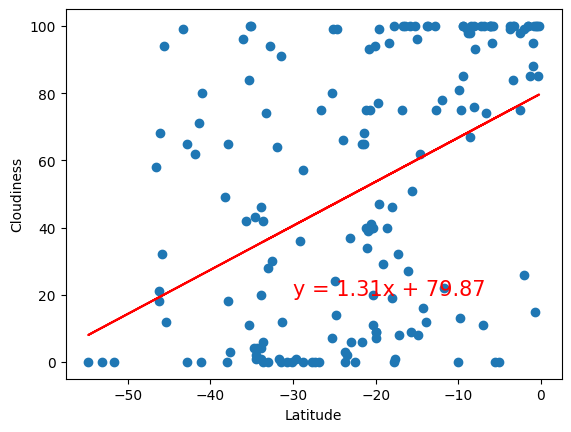

None


In [26]:
# southern_Hemisphere
# YOUR CODE HERE
x_values =southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness")
print(linear_plot(x_values,y_values))

# Discussion about the linear relationship: 

Northern Hemisphere Cloudness and Latitude have positive correlation. r < 0.3 shows no or very weak correlation.Southern Hemisphere Cloudness and Latitude have positive correlation 0.3 ≤ r < 0.5 shows weak correlation.

# Wind Speed vs. Latitude Linear Regression Plot

In [27]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.annotate(line_eq,(10,12),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel ("Wind Speed")
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: 0.2536511723047614


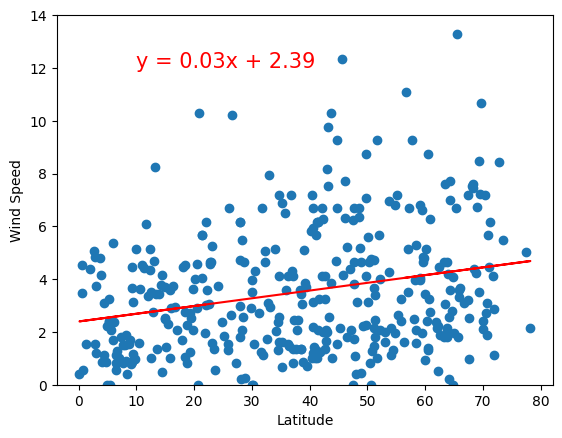

None


In [28]:
# Northern Hemisphere
# YOUR CODE HERE
x_values =northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.ylim (0,14)
print(linear_plot(x_values,y_values))

In [29]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.annotate(line_eq,(-45,10),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel ("Wind Speed")
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: -0.2562964236953694


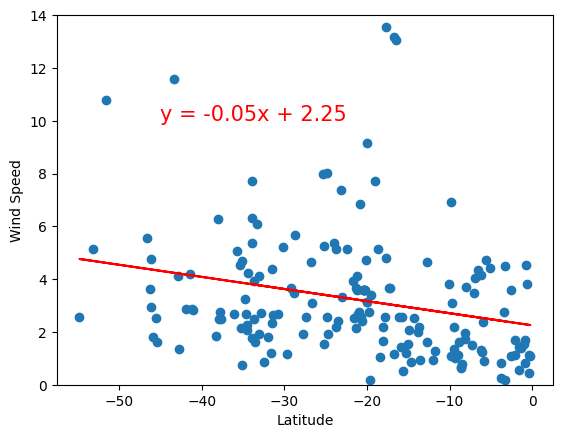

None


In [30]:
# southern_Hemisphere
# YOUR CODE HERE
x_values =southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.ylim (0,14)
print(linear_plot(x_values,y_values))

# Discussion about the linear relationsh
Northern Hemisphere Windspeed and Latitude have positive correlation. r < 0.3 shows no or very weak correlation.
Southern Hemisphere Windspeed and Latitude have negative r < 0.3 shows no or very weak correlation.